# Labolatoirum 9

## Faktoryzacja QR

---
### Zadanie 1. Faktoryzacja QR metodą Grama-Schmidta

---
#### 1.

Napisz funkcję dokonującą faktoryzacji QR macierzy $A \in \mathbb{R}^{nxn}, A = [a_1, a_2, ..., a_n]$ ($a_i$ to kolejne kolumny macierzy A) klasyczną metodą ortogonalizacji Grama-Schmidta.

Z *Kincaid'a & Cheney'a - Analiza numeryczna, rozdział 5.3* wiemy, że ortogonalizację Grama-Schmidta stosowaną do kolumn $A_1, A_2, ..., A_n$ macierzy A rozmiaru $m x n$ możemy interpretować jako jej rozkład QR na czynniki B i T. W macierzy T występują m.in. iloczyny skalarne, a kolumnami macierzy B rozmiaru $m x n$ są wektory $u_k$.

Algorytm można opisać następująco:

dla k = 1:

$$\large
\begin{aligned}
u_1 \leftarrow \frac{a_1}{\|a_1\|}
\end{aligned}
$$

dla k > 1:
$$\large
\begin{aligned}
u_k \leftarrow a_k -  \sum_{i=1}^{k-1} \langle u_i, a_k \rangle u_i
\end{aligned}
$$

gdzie $\langle a, b \rangle$ oznacza iloczyn skalarny wektorów a,b

Otrzymane wyniki, czyli macierze $Q$ i $R$ (w Kincaidzie odpowiednio $B$ i $T$) mają wyglądać następująco:

$$\large
Q = [u_1, u_2, ..., u_n] \\
\
\\
R =
\begin{bmatrix}
\langle u_1, a_1 \rangle &\langle u_1, a_2 \rangle &\langle u_1, a_3 \rangle &... \\
0 &\langle u_2, a_2 \rangle &\langle u_2, a_3 \rangle &... \\
0 &0 &\langle u_3, a_3 \rangle &... \\
\vdots &\vdots &\vdots & \ddots
\end{bmatrix}
$$

Spróbuję teraz przenieść powyższy algorytm do kodu z użyciem biblioteki `numpy`

In [365]:
import numpy as np

In [366]:
def gram_schmidt(A):
    n, m = A.shape
    R = np.zeros(shape=(n,m))
    Q = np.copy(A)
    Q[:, 0] /= np.linalg.norm(Q[:, 0])
    R[0,0] = np.dot(Q[:,0], A[:, 0])
    
    for k in range(1, n):
        a_k = A[:, k]
        tmp = np.sum(np.dot(a_k, Q[:,:k]) * Q[:, :k], axis=1)
        
        Q[:, k] -= tmp
        Q[:, k] /= np.linalg.norm(Q[:, k])
        
        R[:k+1, k] = (A[:,k] @ Q[:, :k+1]).T
    
    return Q, R    

W powyższym kodzie *tmp* oznacza wartość wyrażenia $\sum_{i=1}^{k-1} \langle u_i, a_k \rangle u_i$. Aby uniknąć każdorazowego dodawania $a_k$ do $u_k$ zainicjalizowałem macierz wynikową $Q$ jako kopię macierzy $A$

In [367]:
A = np.array([
    [1, 2, 5],
    [3, 4, 6],
    [8, -3, 12]], dtype="float64")
Q, R = gram_schmidt(A)

print(Q @ R)

[[ 1.  2.  5.]
 [ 3.  4.  6.]
 [ 8. -3. 12.]]


Jak widać funkcja `gram_schmidt` zwraca macierze *Q* oraz *R*, których mnożenie zwraca pierwotną macierz *A*. Wygląda na to, że funkcja faktoryzuje macierz poprawnie, sprawdzimy to dokładniej w kolejnych podpunktach.

---
#### 2.
Przetestuj zaimplementowaną metodę porównując wyniki uzyskane z jej pomocą z wynikami zwracanymi przez funkcję biblioteczną. W testach wykorzystaj 4-5 macierzy losowych o różnym rozmiarze

In [368]:
def rand_M(size):
    return np.random.uniform(size=(size, size))

In [369]:
N = [5, 10, 20, 50, 100]
for n in N:
    M = rand_M(n)
    Q, R = gram_schmidt(M)
    Q_l, R_l = np.linalg.qr(M)
    print("\n------------------")
    print(f"N = {n}")
    print(f"Q =?= Q biblioteczne -> {np.allclose(np.abs(Q), np.abs(Q_l))}")
    print(f"R =?= R biblioteczne -> {np.allclose(np.abs(R), np.abs(R_l))}")
    print(f"Q @ R =?= A -> {np.allclose(Q@R, M)}")


------------------
N = 5
Q =?= Q biblioteczne -> True
R =?= R biblioteczne -> True
Q @ R =?= A -> True

------------------
N = 10
Q =?= Q biblioteczne -> True
R =?= R biblioteczne -> True
Q @ R =?= A -> True

------------------
N = 20
Q =?= Q biblioteczne -> True
R =?= R biblioteczne -> True
Q @ R =?= A -> True

------------------
N = 50
Q =?= Q biblioteczne -> True
R =?= R biblioteczne -> True
Q @ R =?= A -> True

------------------
N = 100
Q =?= Q biblioteczne -> True
R =?= R biblioteczne -> True
Q @ R =?= A -> True


Przetestowaliśmy funkcję dla rozmiarów macierzy $n \in [5, 10, 20, 50, 100]$ i dla każdej macierzy okazało się, że nasze $Q$ oraz $R$ powielają wartości zwrócone przez funkcje biblioteczną (z dokładnością do znaku). Ponadto, w każdym przypadku iloczyn $Q$ @ $R$ dawał macierz początkową $A$ - oznacza to, że fukcja `graham_shcmidt` działa poprawnie. Do porównywania macierzy użyłem funkcji `numpy.allclose`.

---
#### 3.
Wygeneruj 30-50 przypadkowych macierzy 8x8 o różnym wskaźniku uwarunkowania $cond(A_i)$ (stosunek największej do najmniejszej wartości osobliwej). Wykorzystaj w tym celu SVD oraz biblioteczną funkcję realizującą dekompozycję QR (potrzebne będą dwie losowe macierze ortogonalne oraz diagonalna macierz odpowiednio szybko malejących wartości osobliwych).

In [370]:
def get_matrix_with_cond(condition, N):
    M = rand_M(N)
    S, V, D = np.linalg.svd(M)
    V = V[0] * (1 - ((condition-1)/condition)*(V[0] - V)/(V[0] - V[-1]))
    return S @ np.diag(V) @ D

np.linalg.cond(get_matrix_with_cond(10, 8))

10.000000000000007

Napisana wyżej funkcja `get_matrix_with_cond` z dużą dokładnością zwraca losową macierz $A$, ze z góry określoną wartością $cond(A)$ - w tym celu użyłem rozkładu $SVD$, następnie liniowego 'przesunięcia' wartości własnych w wektorze $V$ aby ostatecznie powrócić do macierzy dzięki $S \cdot V` \cdot D$

In [371]:
conds = np.array([2**i for i in range(35)])
conds

array([          1,           2,           4,           8,          16,
                32,          64,         128,         256,         512,
              1024,        2048,        4096,        8192,       16384,
             32768,       65536,      131072,      262144,      524288,
           1048576,     2097152,     4194304,     8388608,    16777216,
          33554432,    67108864,   134217728,   268435456,   536870912,
        1073741824,  2147483648,  4294967296,  8589934592, 17179869184])

In [379]:
matrixes = np.array([get_matrix_with_cond(cond, 8) for cond in conds])
print(np.linalg.cond(matrixes[:2]))
matrixes[:2]

[1. 2.]


array([[[ 1.61485465e+00, -3.20125630e-01,  1.66520194e+00,
         -2.04448667e-01,  1.47567168e+00, -1.44638779e+00,
         -1.64200637e+00,  1.73111399e+00],
        [ 2.06386875e+00,  2.32552203e+00, -1.01594249e-01,
          1.97940966e+00,  3.05390937e-01,  7.24881972e-01,
         -2.87378254e-01, -1.09097350e+00],
        [ 5.59712953e-01, -3.53382146e-01, -2.04783434e+00,
         -7.46341594e-01,  2.24631626e+00,  2.01174363e+00,
          3.90857060e-02,  1.09732956e+00],
        [ 8.93809420e-02, -7.68192619e-01,  4.24713313e-01,
          8.42132663e-01,  2.11909992e+00, -1.31368116e+00,
          2.62294515e+00, -9.50608339e-01],
        [-4.48353981e-01, -6.02955881e-01, -8.07758892e-01,
          2.73849481e+00, -8.09458937e-01, -2.08250650e-01,
          5.13413934e-01,  2.41017147e+00],
        [-6.29593422e-01,  2.83247563e+00, -2.59016816e-03,
         -1.26590991e+00,  3.26094886e-02, -7.72153143e-01,
          1.44812878e+00,  1.66472710e+00],
        [-1.5038

Wygenerowaliśmy 35 losowych macierzy 8x8 o wartości $cond(A) \in [1, 2, 2^2, 2^3 ..., 2^{34}]$.

---
#### 4.
Dla każdej z uzyskanych w ten sposób macierzy $A_i$ wyznacz faktoryzację QR korzystając z zaimplementowanej funkcji ( $A_i = Q_iR_i$). Przedstaw zależność $\|I-Q_i^TQ_i\|$ od $cond(A_i)$

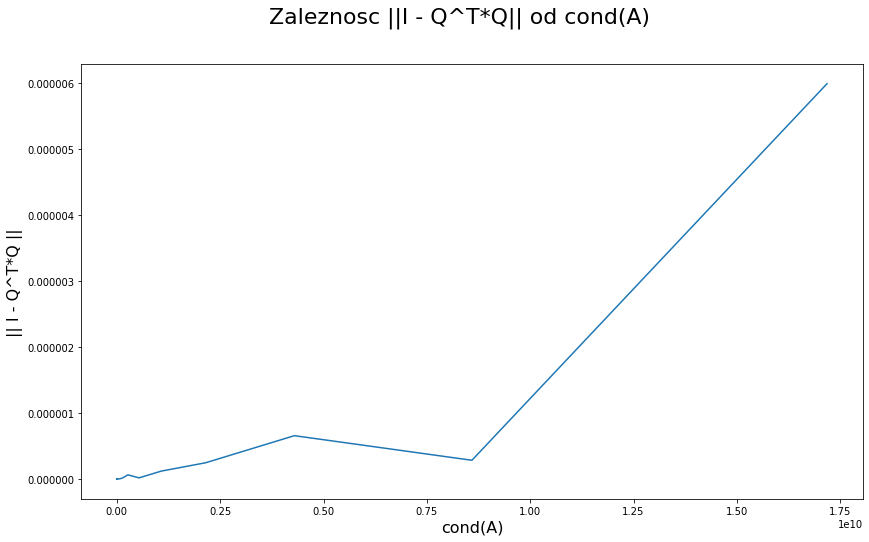

In [380]:
import matplotlib.pyplot as plt

def check(Q):
    return np.max(np.identity(Q.shape[0]) - Q.T @ Q)

def check_matrix(A):
    Q, R = gram_schmidt(A)
    return check(Q)

results = np.array([check_matrix(A) for A in matrixes])

fig = plt.figure(figsize=(14,8))
plt.ylabel('|| I - Q^T*Q ||', fontsize=16)
plt.xlabel('cond(A)', fontsize=16)
fig.suptitle('Zaleznosc ||I - Q^T*Q|| od cond(A)', fontsize=22)
plt.plot(conds, results);

Widzimy na wykresie, że wraz ze wzrostem wartości $cond(A)$ rośnie również wartość normy max $\| I - Q^TQ \|$. Zależność ta przedziałami przypomina liniową.

---
#### 5.
Zinterpretuj wyniki. Jaka jest przyczyna uzyskanych rozbieżności? Od czego zależy wielkość rozbieżności?

Niestety, możemy wyraźnie zaobserwować utratę *ortogonalności* ($\| I - Q^TQ \|$) wraz ze wzrostem wskaźnika uwarunkowania macierzy. Jako przyczynę możemy podejrzewać niestabilność numeryczną algorytmu Grama-Schmidta. Rzeczywiście, udało mi się znaleźć zależność opisującą związek ortogonalności z precyzją obliczeń oraz wskaźnikiem uwarunkowania macierzy:
$$\large
\| I - Q^TQ \| < c\varepsilon K_2(A) 
$$
\
gdzie $\epsilon$ opisuje precyzję obliczeń w danym systemie, $K_2(A)$ to $cond(A)$ - wskaźnik uwarunkowania macierzy, $c$ - stała.

Na szczęście można temu zaradzić modyfikując ten algorytm i sprawić, że stanie się on bardziej stabilny numerycznie. Sposób modyfikacji został opisany na stronach 266-268 *Kincaid'a i Cheney'a - Analiza numeryczna* (rozdział 5.3). 

---
### Zadanie 2 Rozwiązywanie układów równań metodą QR
Bezpośrednie rozwiązywanie układu równanń przy pomocy równań normalnych jest obarczone dużym błędem jeśli macierz $A$ jest źle uwarunkowania (jest współczynnik uwarunkowania jest wysoki). Lepszy sposobem jest wykorzystanie dekompozycji QR w tym celu.

Napisz funkcję rozwiązującą nadokreślony układ równań liniowych metodą QR korzystając z własności macierzy ortagonalnych (tj. $A^T = A^{-1}$), a także z mechanizmu *back substitution*. Następnie wykorzystaj ją do rozwiązania roblemu aproksymacji średniokwadratowej dla zbioru punktów podanego w tabeli poniżej. Przyjmij model postaci:
$$\large
f(x) = \alpha_0 + \alpha_1x + \alpha_2x^2
$$

Przedstaw wizualizację uzyskanego wyniku (punkty oraz funkcja paroksymująca $f$ ).

| x | -5 | -4 | -3 | -2 | -1 | 0  | 1  | 2  | 3  | 4 | 5 |
|---|----|----|----|----|----|----|----|----|----|---|---|
| y | 2  | 7  | 9  | 12 | 13 | 14 | 14 | 13 | 10 | 8 | 4 |

In [ ]:
X = np.arange(-5, 6, 1, dtype="float64")
Y = np.array([2, 7, 9, 12, 13, 14, 14, 13, 10, 8, 4], dtype="float64")
A = np.array([[1, x, x*x] for x in X])

`A` to macierz potrzebna nam do aproksymacji funkcją kwadratową.

In [ ]:
def backward_substitution(A_original, B):
    n = B.shape[0]
    A = np.copy(A_original)
    result = np.copy(B)
    
    for i in range(n-1, -1, -1):
        divisor = A[i,i]
        for j in range(i-1, -1, -1):
            tmp = A[j,i] / divisor
            A[j] -= tmp * A[i]
            B[j] -= tmp * B[i]
            # this element must equal 0 no matter of numeric errors
            A[j, i] = 0.0 
        B[i] /= divisor
            
    return B

In [ ]:
def get_function_approx(A, Y):
    Q, R = gram_schmidt(A.T @ A)
    return backward_substitution(R, Q.T @ A.T @ Y)

Powyższa funkcja zwraca nam wektor $W = [\alpha_0, \alpha_1, \alpha_2]$, który jest swoistą reprezentacją funkcji kwadratowej:
$$\large
f(x) = \alpha_0 + \alpha_1x + \alpha_2x^2
$$

Wektor uzyskujemy dzięki rozwiązaniu równania 
$$\large
RW = Q^TA^TY
$$

Ponieważ $R$ jest macierzą górną trójkątną to powyższy układ możemy rozwiązać za pomocą *backward substitution*.

In [ ]:
alphas = get_function_approx(A, Y.T)
print(f" alpha_0 = {alphas[0]}")
print(f" alpha_1 = {alphas[1]}")
print(f" alpha_2 = {alphas[2]}")

appr_f = lambda x : alphas[0] + alphas[1] * x + alphas[2] * x * x

In [ ]:
X_appr = np.arange(-6, 6.1, 0.1)
Y_appr = appr_f(X_appr)

plt.figure(figsize=(14, 8))
plt.ylabel('y', fontsize=16)
plt.xlabel('x', fontsize=16)
plt.title('Wykres funkcji aproksymującej wraz z rzeczywistymi punktami', fontsize=22)
plt.plot(X_appr, Y_appr)
plt.scatter(X, Y, color="red");

Kolorem niebieskim została oznaczona funkcja aproksymująca, a czerwonym rzeczywiste punkty z treści zadania.

---
### Wnioski



* Faktoryzacja QR metodą Grama-Schmidta jest stosunkowo prostym sposobem na znalezienie macierzy ortogonalnej Q.
* Powyższa metoda ma jednak pewne wady - potrafi być niestabilna numerycznie dla bardzo źle uwarunkowanych macierzy - trzeba wprowadzić pewne modyfikacje aby temu zaradzić.
* Dzięki faktoryzacji QR możemy rozwiązywać układy równań za pomocą `backward substitution`. Na tych zajęciach użyliśmy tego dzięki metodzie najmniejszych kwadratów przybliżyć funkcję pewną funkcję.
* Przy projektowaniu algorytmów lub aproksymacji funkcji zawsze trzeba zwrócić uwagę na stabilność numeryczną naszego algorytmu lub algorytmu (np. faktoryzacji), z którego korzystamy jako tylko krok do rozwiązania problemu.

* Faktoryzacja QR metodą Grama-Schmidta jest stosunkowo prostym sposobem na znalezienie macierzy ortogonalnej Q.
* Powyższa metoda ma jednak pewne wady - potrafi być niestabilna numerycznie dla bardzo źle uwarunkowanych macierzy - trzeba wprowadzić pewne modyfikacje aby temu zaradzić.
* Dzięki faktoryzacji QR możemy rozwiązywać układy równań za pomocą `backward substitution`. Na tych zajęciach użyliśmy tego dzięki metodzie najmniejszych kwadratów przybliżyć funkcję pewną funkcję.
* Przy projektowaniu algorytmów lub aproksymacji funkcji zawsze trzeba zwrócić uwagę na stabilność numeryczną naszego algorytmu lub algorytmu (np. faktoryzacji), z którego korzystamy jako tylko krok do rozwiązania problemu.

Niestety, możemy wyraźnie zaobserwować utratę *ortogonalności* ($\| I - Q^TQ \|$) wraz ze wzrostem wskaźnika uwarunkowania macierzy. Jako przyczynę możemy podejrzewać niestabilność numeryczną algorytmu Grama-Schmidta. Rzeczywiście, udało mi się znaleźć zależność opisującą związek ortogonalności z precyzją obliczeń oraz wskaźnikiem uwarunkowania macierzy:
$$\large
\| I - Q^TQ \| < c\varepsilon K_2(A) 
$$
\
gdzie $\epsilon$ opisuje precyzję obliczeń w danym systemie, $K_2(A)$ to $cond(A)$ - wskaźnik uwarunkowania macierzy, $c$ - stała.

Na szczęście można temu zaradzić modyfikując ten algorytm i sprawić, że stanie się on bardziej stabilny numerycznie. Sposób modyfikacji został opisany na stronach 266-268 *Kincaid'a i Cheney'a - Analiza numeryczna* (rozdział 5.3). 

---
### Zadanie 2 Rozwiązywanie układów równań metodą QR
Bezpośrednie rozwiązywanie układu równanń przy pomocy równań normalnych jest obarczone dużym błędem jeśli macierz $A$ jest źle uwarunkowania (jest współczynnik uwarunkowania jest wysoki). Lepszy sposobem jest wykorzystanie dekompozycji QR w tym celu.

Napisz funkcję rozwiązującą nadokreślony układ równań liniowych metodą QR korzystając z własności macierzy ortagonalnych (tj. $A^T = A^{-1}$), a także z mechanizmu *back substitution*. Następnie wykorzystaj ją do rozwiązania roblemu aproksymacji średniokwadratowej dla zbioru punktów podanego w tabeli poniżej. Przyjmij model postaci:
$$\large
f(x) = \alpha_0 + \alpha_1x + \alpha_2x^2
$$

Przedstaw wizualizację uzyskanego wyniku (punkty oraz funkcja paroksymująca $f$ ).

| x | -5 | -4 | -3 | -2 | -1 | 0  | 1  | 2  | 3  | 4 | 5 |
|---|----|----|----|----|----|----|----|----|----|---|---|
| y | 2  | 7  | 9  | 12 | 13 | 14 | 14 | 13 | 10 | 8 | 4 |

In [374]:
X = np.arange(-5, 6, 1, dtype="float64")
Y = np.array([2, 7, 9, 12, 13, 14, 14, 13, 10, 8, 4], dtype="float64")
A = np.array([[1, x, x*x] for x in X])

`A` to macierz potrzebna nam do aproksymacji funkcją kwadratową.

In [375]:
def backward_substitution(A_original, B):
    n = B.shape[0]
    A = np.copy(A_original)
    result = np.copy(B)
    
    for i in range(n-1, -1, -1):
        divisor = A[i,i]
        for j in range(i-1, -1, -1):
            tmp = A[j,i] / divisor
            A[j] -= tmp * A[i]
            B[j] -= tmp * B[i]
            # this element must equal 0 no matter of numeric errors
            A[j, i] = 0.0 
        B[i] /= divisor
            
    return B

In [376]:
def get_function_approx(A, Y):
    Q, R = gram_schmidt(A.T @ A)
    return backward_substitution(R, Q.T @ A.T @ Y)

Powyższa funkcja zwraca nam wektor $W = [\alpha_0, \alpha_1, \alpha_2]$, który jest swoistą reprezentacją funkcji kwadratowej:
$$\large
f(x) = \alpha_0 + \alpha_1x + \alpha_2x^2
$$

Wektor uzyskujemy dzięki rozwiązaniu równania 
$$\large
RW = Q^TA^TY
$$

Ponieważ $R$ jest macierzą górną trójkątną to powyższy układ możemy rozwiązać za pomocą *backward substitution*.

In [377]:
alphas = get_function_approx(A, Y.T)
print(f" alpha_0 = {alphas[0]}")
print(f" alpha_1 = {alphas[1]}")
print(f" alpha_2 = {alphas[2]}")

appr_f = lambda x : alphas[0] + alphas[1] * x + alphas[2] * x * x

 alpha_0 = 13.972027972028217
 alpha_1 = 0.18181818181818182
 alpha_2 = -0.4335664335664472


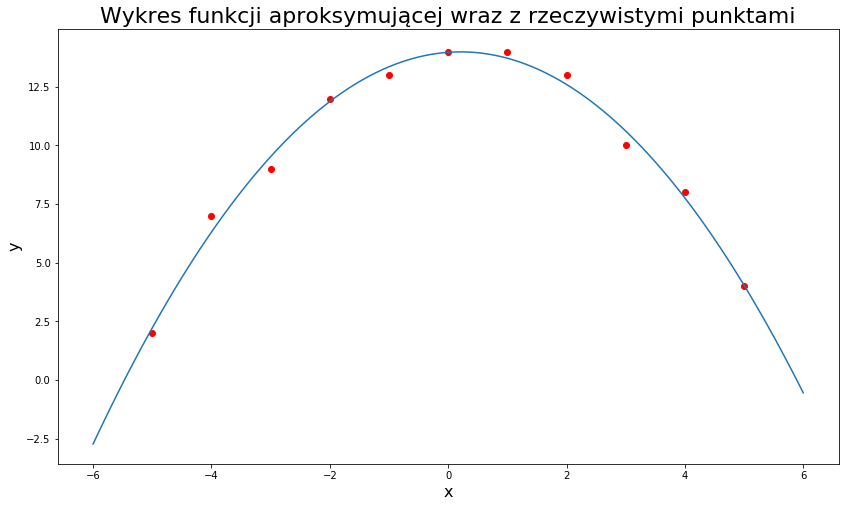

In [378]:
X_appr = np.arange(-6, 6.1, 0.1)
Y_appr = appr_f(X_appr)

plt.figure(figsize=(14, 8))
plt.ylabel('y', fontsize=16)
plt.xlabel('x', fontsize=16)
plt.title('Wykres funkcji aproksymującej wraz z rzeczywistymi punktami', fontsize=22)
plt.plot(X_appr, Y_appr)
plt.scatter(X, Y, color="red");

Kolorem niebieskim została oznaczona funkcja aproksymująca, a czerwonym rzeczywiste punkty z treści zadania.

---
### Wnioski



* Faktoryzacja QR metodą Grama-Schmidta jest stosunkowo prostym sposobem na znalezienie macierzy ortogonalnej Q.
* Powyższa metoda ma jednak pewne wady - potrafi być niestabilna numerycznie dla bardzo źle uwarunkowanych macierzy - trzeba wprowadzić pewne modyfikacje aby temu zaradzić.
* Dzięki faktoryzacji QR możemy rozwiązywać układy równań za pomocą `backward substitution`. Na tych zajęciach użyliśmy tego dzięki metodzie najmniejszych kwadratów przybliżyć funkcję pewną funkcję.
* Przy projektowaniu algorytmów lub aproksymacji funkcji zawsze trzeba zwrócić uwagę na stabilność numeryczną naszego algorytmu lub algorytmu (np. faktoryzacji), z którego korzystamy jako tylko krok do rozwiązania problemu.